<a href="https://colab.research.google.com/github/Prateek-Bhatt/protekbot/blob/main/Height_Vs_Age_(SVR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Support Vector Regression**

Importing the libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing the dataset

In [26]:
dataset = pd.read_csv('HeightVsWeight.csv')
X = dataset.iloc[:, 0: -1].values
y = dataset.iloc[:, -1].values

In [27]:
print(y)

[138 138 138 139 139 139 140 140 140 141 141 141 142 142 142 143 143 143
 144 144 145 145 146 146 147 147 148 148 149 149 150 150 151 152 153 155
 156 157 158 159 160 161 162 163 164 164 165 166 167 168 169 170 171 172
 173 175 178 180 183 185 188 190 193 195 199 203 204 205 206 207 208]


In [28]:
print(X)

[[10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]
 [54]
 [55]
 [56]
 [57]
 [58]
 [59]
 [60]
 [61]
 [62]
 [63]
 [64]
 [65]
 [66]
 [67]
 [68]
 [69]
 [70]
 [71]
 [72]
 [73]
 [74]
 [75]
 [76]
 [77]
 [78]
 [79]
 [80]]


In [29]:
y = y.reshape(len(y), 1)

In [30]:
print(y)

[[138]
 [138]
 [138]
 [139]
 [139]
 [139]
 [140]
 [140]
 [140]
 [141]
 [141]
 [141]
 [142]
 [142]
 [142]
 [143]
 [143]
 [143]
 [144]
 [144]
 [145]
 [145]
 [146]
 [146]
 [147]
 [147]
 [148]
 [148]
 [149]
 [149]
 [150]
 [150]
 [151]
 [152]
 [153]
 [155]
 [156]
 [157]
 [158]
 [159]
 [160]
 [161]
 [162]
 [163]
 [164]
 [164]
 [165]
 [166]
 [167]
 [168]
 [169]
 [170]
 [171]
 [172]
 [173]
 [175]
 [178]
 [180]
 [183]
 [185]
 [188]
 [190]
 [193]
 [195]
 [199]
 [203]
 [204]
 [205]
 [206]
 [207]
 [208]]


Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [32]:
print(X)

[[-1.70782513]
 [-1.65903012]
 [-1.61023512]
 [-1.56144012]
 [-1.51264511]
 [-1.46385011]
 [-1.41505511]
 [-1.3662601 ]
 [-1.3174651 ]
 [-1.26867009]
 [-1.21987509]
 [-1.17108009]
 [-1.12228508]
 [-1.07349008]
 [-1.02469508]
 [-0.97590007]
 [-0.92710507]
 [-0.87831007]
 [-0.82951506]
 [-0.78072006]
 [-0.73192505]
 [-0.68313005]
 [-0.63433505]
 [-0.58554004]
 [-0.53674504]
 [-0.48795004]
 [-0.43915503]
 [-0.39036003]
 [-0.34156503]
 [-0.29277002]
 [-0.24397502]
 [-0.19518001]
 [-0.14638501]
 [-0.09759001]
 [-0.048795  ]
 [ 0.        ]
 [ 0.048795  ]
 [ 0.09759001]
 [ 0.14638501]
 [ 0.19518001]
 [ 0.24397502]
 [ 0.29277002]
 [ 0.34156503]
 [ 0.39036003]
 [ 0.43915503]
 [ 0.48795004]
 [ 0.53674504]
 [ 0.58554004]
 [ 0.63433505]
 [ 0.68313005]
 [ 0.73192505]
 [ 0.78072006]
 [ 0.82951506]
 [ 0.87831007]
 [ 0.92710507]
 [ 0.97590007]
 [ 1.02469508]
 [ 1.07349008]
 [ 1.12228508]
 [ 1.17108009]
 [ 1.21987509]
 [ 1.26867009]
 [ 1.3174651 ]
 [ 1.3662601 ]
 [ 1.41505511]
 [ 1.46385011]
 [ 1.51264

In [33]:
print(y)

[[-1.10522232]
 [-1.10522232]
 [-1.10522232]
 [-1.05690287]
 [-1.05690287]
 [-1.05690287]
 [-1.00858342]
 [-1.00858342]
 [-1.00858342]
 [-0.96026397]
 [-0.96026397]
 [-0.96026397]
 [-0.91194452]
 [-0.91194452]
 [-0.91194452]
 [-0.86362507]
 [-0.86362507]
 [-0.86362507]
 [-0.81530563]
 [-0.81530563]
 [-0.76698618]
 [-0.76698618]
 [-0.71866673]
 [-0.71866673]
 [-0.67034728]
 [-0.67034728]
 [-0.62202783]
 [-0.62202783]
 [-0.57370838]
 [-0.57370838]
 [-0.52538893]
 [-0.52538893]
 [-0.47706949]
 [-0.42875004]
 [-0.38043059]
 [-0.28379169]
 [-0.23547224]
 [-0.18715279]
 [-0.13883335]
 [-0.0905139 ]
 [-0.04219445]
 [ 0.006125  ]
 [ 0.05444445]
 [ 0.1027639 ]
 [ 0.15108335]
 [ 0.15108335]
 [ 0.1994028 ]
 [ 0.24772224]
 [ 0.29604169]
 [ 0.34436114]
 [ 0.39268059]
 [ 0.44100004]
 [ 0.48931949]
 [ 0.53763894]
 [ 0.58595838]
 [ 0.68259728]
 [ 0.82755563]
 [ 0.92419452]
 [ 1.06915287]
 [ 1.16579177]
 [ 1.31075011]
 [ 1.40738901]
 [ 1.55234736]
 [ 1.64898625]
 [ 1.84226405]
 [ 2.03554184]
 [ 2.08386

Training the SVR model on the whole dataset

In [34]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Predicting a new result

In [36]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[18.5]])).reshape(-1, 1))

array([[140.46451015]])

Visualizing the SVR results

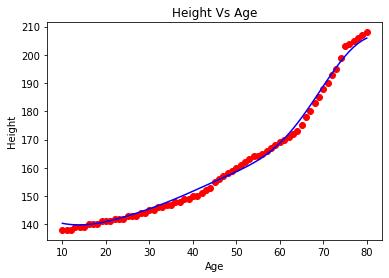

In [40]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform((regressor.predict(X)).reshape(-1, 1)), color = 'blue')
plt.title('Height Vs Age')
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()

Visualizing the SVR results (for higher resolution and smoother curve)

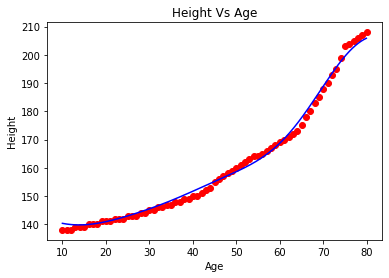

In [42]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape(-1, 1)
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform((regressor.predict(sc_X.transform(X_grid))).reshape(-1, 1)), color = 'blue')
plt.title('Height Vs Age')
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()